## 1. Defining the Question

# Application of Naive Bayes as a Spam Detection Model

### a) Specifying the Question


> We have a set containg 57 features that are supposed to help predict if a message is a spam message or an actual message 
> We intend to train the model using Naive Bayes to determine it's accuracy in detecting spam messages



### b) Defining the Metric for Success

> The ability of the model to predict spam messages should be atleat 80% Accurate and not above 98% acccuarate this is to avoid overfitting 

### c) Understanding the context 

> The datassets contains columns that contain analyses message content that has been presented in numerics to identify the patter spam messages take and actual messages to therefore allowing the machine to detect a spam message from an actual message assuming the relationships between the columns improving it's ability to detect random patterns which help on the test dataset.

### d) Recording the Experimental Design

> wE intend to use Gaussian(NB)Classifier method as we will scale the data to almost assume a normal distribution then classify our data accordingly

### e) Data Relevance

> The data contains 

In [146]:
# Importing our libraries
# 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

## 2. Reading the Data

In [147]:
# Loading the Dataset
spam = pd.read_csv('spambase Data.csv', header = None)

spam.head()
#

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [148]:
# renaming the columns

names = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over',
        'word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail', 'word_freq_receive','word_freq_will',
        'word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email',
         'word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp',
         'word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857',
         'word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts',
         'word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project',
         'word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(','char_freq_[',
         'char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest',
         'capital_run_length_total','spam/target']

In [149]:
spam.columns = names

spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam/target
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## 3. Checking the Data

In [150]:
# Determining the no. of records in our dataset
## We create a function that will enable us to check for various information about our dataset
# Determining the no. of records in our dataset the N0. of colums, the duplicates, datatypes 
# and if there are any null values and duplicates

def check(data):
    df = data.shape
    df1 = data.isnull().value_counts()
    df2 = data.duplicated().value_counts()
    df3 = data.columns
    df4 = data.info()
    df5 = data.dtypes
    


    print('Data_Shape',"\n", df,"\n")
    print('Columns',"\n", df3,"\n") 
    print('Data info',"\n", df4,"\n")
    print('Data types',"\n", df5,"\n")
    print('Checking for No. of null values',"\n", df1,"\n") 
    print('Checking for No. of duplicates',"\n", df2)

In [151]:
check(spam)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

## 5. Tidying the Dataset

Removing the duplicates and the null values 

In [152]:
spam.drop_duplicates(inplace = True )

In [153]:
spam.duplicated().sum()

0

## 6. Exploratory Analysis

In [154]:
# Ploting the univariate summaries and recording our observations
#

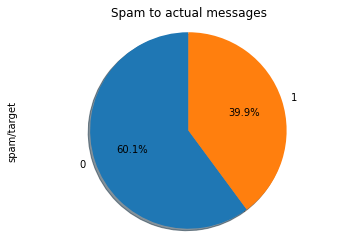

In [176]:

# fig, ax1 = plt.subplots()
# ax1.pie(data)\

pie = spam['spam/target'].value_counts()

pie.plot(kind = 'pie', autopct= '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.title('Spam to actual messages')
plt.show()

#### Majority of the messages were categorized as spams 

In [156]:
# The correlation between different columns to identify the most correlated columns that can help detect 
spam.corr()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam/target
word_freq_make,1.000000,0.034012,0.063207,0.005388,0.021740,0.055067,0.011061,-0.004370,0.103842,0.040829,...,-0.027248,-0.019636,-0.034784,0.059184,0.101957,-0.009149,0.044783,0.059128,0.084127,0.129194
word_freq_address,0.034012,1.000000,0.027789,-0.008947,0.036975,0.005526,0.077374,0.013706,0.053426,0.184304,...,0.014735,-0.028348,-0.019436,0.031858,0.044354,0.030669,0.029355,0.053870,0.034590,0.100651
word_freq_all,0.063207,0.027789,1.000000,-0.019901,0.065676,0.066547,0.028581,0.007221,0.077561,0.025138,...,-0.036778,-0.024545,-0.035805,0.097316,0.072944,-0.004520,0.095671,0.092513,0.051961,0.172350
word_freq_3d,0.005388,-0.008947,-0.019901,1.000000,0.000256,-0.009163,0.014289,0.003801,-0.001040,-0.003845,...,-0.000028,-0.011443,-0.007514,-0.003867,0.008273,0.000134,0.005754,0.022105,0.023785,0.056383
word_freq_our,0.021740,0.036975,0.065676,0.000256,1.000000,0.041392,0.135957,0.023411,0.014483,0.027233,...,-0.035049,-0.054580,-0.027988,0.019203,0.040696,0.002144,0.050832,0.042985,-0.010498,0.230074
word_freq_over,0.055067,0.005526,0.066547,-0.009163,0.041392,1.000000,0.046868,0.079704,0.097037,0.010099,...,-0.021744,-0.011584,-0.016729,0.058121,0.105927,0.020413,-0.013554,0.065709,0.063403,0.212311
word_freq_remove,0.011061,0.077374,0.028581,0.014289,0.135957,0.046868,1.000000,0.033692,0.049238,0.055695,...,-0.034080,-0.061318,-0.029466,0.050992,0.067236,0.049306,0.039174,0.050825,-0.017081,0.334456
word_freq_internet,-0.004370,0.013706,0.007221,0.003801,0.023411,0.079704,0.033692,1.000000,0.106890,0.079045,...,-0.028976,-0.042751,-0.021383,0.029031,0.053569,-0.008121,0.009977,0.035603,0.036895,0.200666
word_freq_order,0.103842,0.053426,0.077561,-0.001040,0.014483,0.097037,0.049238,0.106890,1.000000,0.123366,...,-0.015004,-0.037377,0.017321,0.035937,0.152457,-0.002075,0.110788,0.166299,0.233198,0.221454
word_freq_mail,0.040829,0.184304,0.025138,-0.003845,0.027233,0.010099,0.055695,0.079045,0.123366,1.000000,...,0.006772,-0.004960,0.003800,0.031602,0.077405,0.034482,0.073128,0.101546,0.078587,0.131686


In [157]:
spam.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


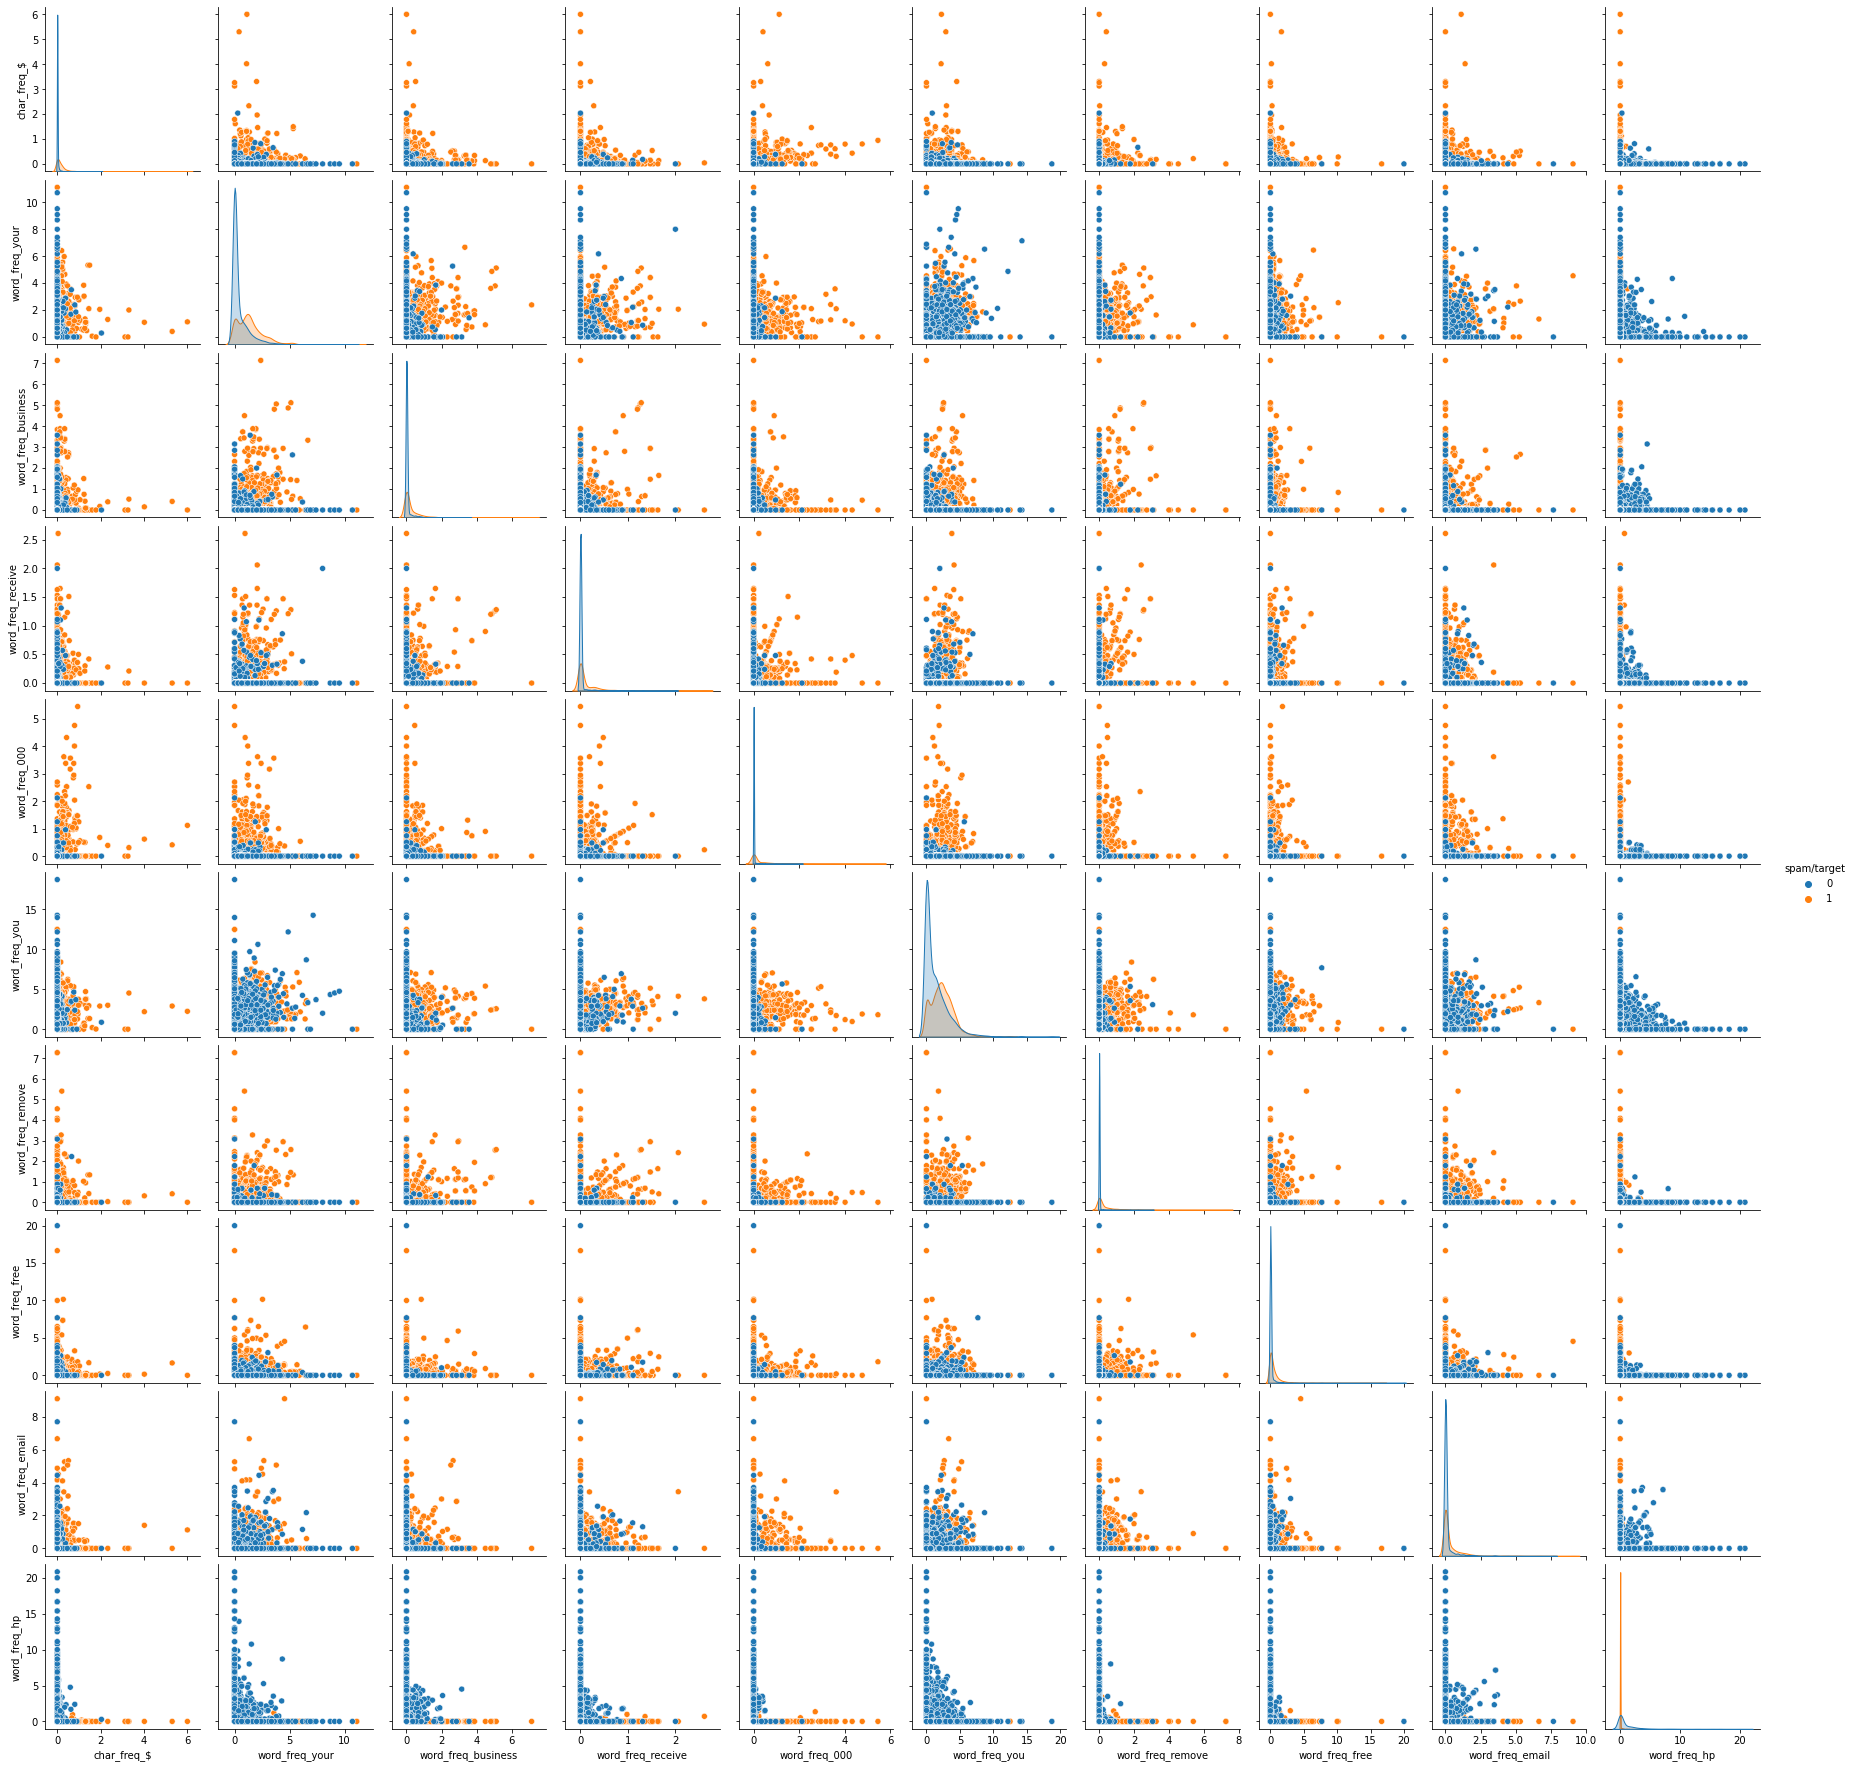

In [158]:
# After finding the most correlated columns we plotted a pairplot to show these relationships 
corr = spam[['char_freq_$', 'word_freq_your','word_freq_business', 'word_freq_receive', 'word_freq_000','word_freq_you', 'word_freq_remove', 'word_freq_free', 'word_freq_email','word_freq_hp','spam/target']]

sns.pairplot(corr, hue = 'spam/target')

## 7. Implementing the Solution

### Naive Bayes

In [281]:
# We slit our data to test and train data

# Implementing the Solution
# 
corr = spam[['char_freq_$', 'word_freq_your','word_freq_business', 'word_freq_receive', 'word_freq_000','word_freq_you', 'word_freq_remove', 'word_freq_free', 'word_freq_email','word_freq_hp','spam/target']]
X = corr.iloc[:, :-1].values
y = corr.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

> Scaling our data to reduce the mean to less than 1 and std to 1 in order to improve the models perfomance on the data

In [282]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [283]:
# Running the model
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[467  28]
 [103 244]]


In [284]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       495
           1       0.90      0.70      0.79       347

    accuracy                           0.84       842
   macro avg       0.86      0.82      0.83       842
weighted avg       0.85      0.84      0.84       842



In [285]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8444180522565321

> The model perfomed well and got ana accuaracy of 84% which implies there is room for improvement

## Challenging the Solution

In [263]:
# Implementing the Solution by changing sample size from a ratio of 80:20 to 70:30
# 
corr = spam[['char_freq_$', 'word_freq_your','word_freq_business', 'word_freq_receive', 'word_freq_000','word_freq_you', 'word_freq_remove', 'word_freq_free', 'word_freq_email','word_freq_hp','spam/target']]
X = corr.iloc[:, :-1].values
y = corr.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [264]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [269]:
from sklearn.naive_bayes import GaussianNB
classifier1 = GaussianNB()
classifier1.fit(X_train, y_train)

GaussianNB()

In [270]:


pred1= classifier1.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[695  42]
 [141 385]]


In [271]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       737
           1       0.90      0.73      0.81       526

    accuracy                           0.86      1263
   macro avg       0.87      0.84      0.85      1263
weighted avg       0.86      0.86      0.85      1263



In [272]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8551068883610451

> The accuracy of the model slightly increases to 85.1% after increasing the sample size from 80 to 20 to 70 to 30%

## 8. Challenging the solution

In [273]:
# Tuning the parameters 
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [274]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)
...
# Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(priors=None, var_smoothing=1.0)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=8.111308307896872e-05)


GaussianNB(var_smoothing=1.0)

In [276]:
from sklearn.naive_bayes import GaussianNB
classifier2 = GaussianNB(var_smoothing=8.111308307896872e-05)
classifier2.fit(X_train, y_train)

GaussianNB(var_smoothing=8.111308307896872e-05)

In [278]:
pred2 = classifier2.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred2))

[[695  42]
 [141 385]]


In [279]:
# Reviewing the Solution 
#
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       737
           1       0.90      0.73      0.81       526

    accuracy                           0.86      1263
   macro avg       0.87      0.84      0.85      1263
weighted avg       0.86      0.86      0.85      1263



In [280]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred2)

0.8551068883610451

> The model does not really improve from the sample change as it it sticks at 85.1 but it is more accurate than the baseline model

## Conclusion

> Gaussian (NB) A Naive Bayes Model can be improved by changing the sample size and in adddition altering the parameters 

## 9. Follow up questions

The model improved from 84.4 to 85.1 which is a slight change but the prediction was not generally good 

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.

